In [ ]:
                                             pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
df= yf.download('^DJI', period='5000d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-08,7425.819824,7622.660156,7331.419922,7501.490234,7501.490234,377960000
2002-10-09,7499.959961,7500.029785,7282.390137,7286.270020,7286.270020,377870000
2002-10-10,7286.339844,7560.930176,7197.490234,7533.950195,7533.950195,393740000
2002-10-11,7540.740234,7901.259766,7540.740234,7850.290039,7850.290039,351520000
2002-10-14,7848.209961,7915.000000,7745.700195,7877.399902,7877.399902,228340000
...,...,...,...,...,...,...
2022-08-11,33451.511719,33651.800781,33289.828125,33336.671875,33336.671875,308030000
2022-08-12,33430.718750,33767.089844,33398.320312,33761.050781,33761.050781,299140000
2022-08-15,33710.699219,33954.710938,33582.960938,33912.441406,33912.441406,262670000


In [ ]:
df1=df.reset_index().Close
df1

0        7501.490234
1        7286.270020
2        7533.950195
3        7850.290039
4        7877.399902
            ...     
4995    33336.671875
4996    33761.050781
4997    33912.441406
4998    34152.011719
4999    33980.320312
Name: Close, Length: 5000, dtype: float64

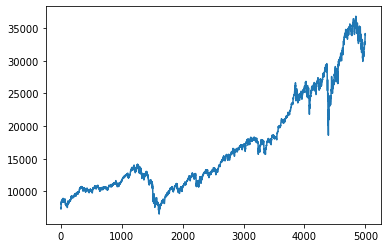

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
df1.shape

(5000,)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler #LSTM sensitive to scale of data
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.03154904],
       [0.02443493],
       [0.032622  ],
       ...,
       [0.90456334],
       [0.91248234],
       [0.90680708]])

In [ ]:
df1.shape

(5000, 1)

In [ ]:
training_size= int(len(df1)*0.65)
test_size=len(df)-training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:]

In [ ]:
train_data[1,0]

0.024434932807457344

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape

((3244, 5), (3244,))

In [ ]:
X_test.shape

(1744, 5)

In [ ]:
X_train

array([[0.03154904, 0.02443493, 0.032622  , 0.04307862, 0.04397474],
       [0.02443493, 0.032622  , 0.04307862, 0.04397474, 0.05647878],
       [0.032622  , 0.04307862, 0.04397474, 0.05647878, 0.04921825],
       ...,
       [0.30821484, 0.30144156, 0.32190491, 0.33411079, 0.33372207],
       [0.30144156, 0.32190491, 0.33411079, 0.33372207, 0.32992139],
       [0.32190491, 0.33411079, 0.33372207, 0.32992139, 0.31439613]])

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
#For LSTM

In [ ]:
X_train

array([[[0.03154904],
        [0.02443493],
        [0.032622  ],
        [0.04307862],
        [0.04397474]],

       [[0.02443493],
        [0.032622  ],
        [0.04307862],
        [0.04397474],
        [0.05647878]],

       [[0.032622  ],
        [0.04307862],
        [0.04397474],
        [0.05647878],
        [0.04921825]],

       ...,

       [[0.30821484],
        [0.30144156],
        [0.32190491],
        [0.33411079],
        [0.33372207]],

       [[0.30144156],
        [0.32190491],
        [0.33411079],
        [0.33372207],
        [0.32992139]],

       [[0.32190491],
        [0.33411079],
        [0.33372207],
        [0.32992139],
        [0.31439613]]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
51/51 [==============================] - 12s 59ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 2/5
51/51 [==============================] - 1s 22ms/step - loss: 8.1557e-05 - val_loss: 0.0037
Epoch 3/5
51/51 [==============================] - 1s 21ms/step - loss: 4.6859e-05 - val_loss: 0.0015
Epoch 4/5
51/51 [==============================] - 1s 22ms/step - loss: 4.4052e-05 - val_loss: 0.0011
Epoch 5/5
51/51 [==============================] - 1s 22ms/step - loss: 4.3534e-05 - val_loss: 4.6456e-04


In [ ]:
train_predict=model.predict(X_train)
test_predict= model.predict(X_test)

55/55 [==============================] - 0s 5ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

12325.14691075312

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

26719.40520726251

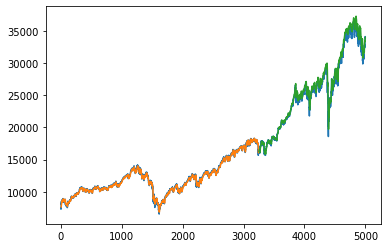

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1750

In [ ]:
x_input=test_data[len(test_data)-look_back:].reshape(1,-1)
x_input.shape

(1, 5)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8855312694115474,
 0.8995591190981429,
 0.9045633379699658,
 0.9124823374386646,
 0.906807076006287]

In [ ]:
from numpy import array

lst_output=[]
n_steps=look_back
i=0
while(i<30):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9241546]
6
1 day input [0.89955912 0.90456334 0.91248234 0.90680708 0.92415458]
1 day output [[0.9319263]]
2 day input [0.90456334 0.91248234 0.90680708 0.92415458 0.93192631]
2 day output [[0.93763256]]
3 day input [0.91248234 0.90680708 0.92415458 0.93192631 0.93763256]
3 day output [[0.9439489]]
4 day input [0.90680708 0.92415458 0.93192631 0.93763256 0.94394892]
4 day output [[0.9499891]]
5 day input [0.92415458 0.93192631 0.93763256 0.94394892 0.94998908]
5 day output [[0.95989984]]
6 day input [0.93192631 0.93763256 0.94394892 0.94998908 0.95989984]
6 day output [[0.9668245]]
7 day input [0.93763256 0.94394892 0.94998908 0.95989984 0.96682447]
7 day output [[0.9735897]]
8 day input [0.94394892 0.94998908 0.95989984 0.96682447 0.97358972]
8 day output [[0.98081374]]
9 day input [0.94998908 0.95989984 0.96682447 0.97358972 0.98081374]
9 day output [[0.9883302]]
10 day input [0.95989984 0.96682447 0.97358972 0.98081374 0.98833019]
10 day output [[0.99624085]]
11 day input [0.9668

In [ ]:
day_new=np.arange(1,6)
day_pred=np.arange(6,36)

In [ ]:
import matplotlib.pyplot as plt

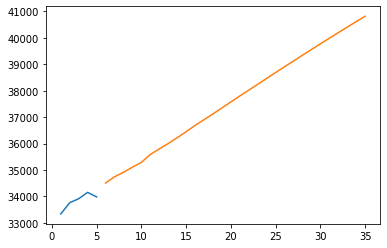

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-5:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
scaler.inverse_transform(lst_output).tolist()

[[34505.127377194876],
 [34740.242418363516],
 [34912.87132950779],
 [35103.95774871571],
 [35286.688160463],
 [35586.51447477349],
 [35796.0025029878],
 [36000.668786715774],
 [36219.21426539938],
 [36446.60622069106],
 [36685.92451032554],
 [36902.37287276471],
 [37122.55384967162],
 [37348.00736991363],
 [37574.788041966385],
 [37800.317296414985],
 [38020.92382743512],
 [38243.2253621266],
 [38466.03539791948],
 [38687.666143924],
 [38907.51893926901],
 [39125.68394372426],
 [39343.32602151495],
 [39559.65537305805],
 [39774.15267807979],
 [39986.76384071831],
 [40197.575414352585],
 [40406.60182454577],
 [40613.51488973596],
 [40818.13789677445]]